In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import pandas as pd

In [3]:
# manually add a2e-mmc repos to PYTHONPATH if needed
import os, sys
module_path = os.path.join(os.environ['HOME'],'tools','a2e-mmc')
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from mmctools.plotting import plot_timehistory_at_height, plot_profile, plot_spectrum, plot_timeheight
import assessment.studies.profile_assimilation_wrf.helpers as helper

In [5]:
import matplotlib as mpl
import matplotlib.dates as mdates
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize']  = 16

# SWIFT profile assimilation with WRF: Produce figures
written by [Dries Allaerts](mailto:dries.allaerts@nrel.gov)

Produce figures for the paper on profile assimilation with WRF. This notebook depends on:
- SOWFA simulations driven with
    - Indirect data assimilation (cubic fit)
    - Indirect data assimilation (linear fit)
    - Direct data assimilation
    - Mesoscale budget components
- reference data:
    - WRF data (version 3.7.1), extracted from the actual SOWFA input files
    - TTU tower data, generated in `process_TTU_tower.ipynb`
    - TTU radar data, generated in `process_TTU_radar.ipynb`

Main directory on Eagle

In [6]:
datadir = '/projects/mmc/dallaert/profile_assimilation_wrf/'

Name of SOWFA simulation folders

In [7]:
budget_components_data = 'run.tency'
direct_assimilatn_data = 'run.assim'
indrct_assimilatn_data = 'run.reg.W.none.Fw0'
indrct_assimilatn_M1_data = 'run.reg.M1'

Reference data

In [9]:
# Datasets generated in process_TTU_tower.ipynb, which can be found in
# a2e-mmc/assessment/datasets/SWiFT/
tower_data_10min = 'TTU_tilt_corrected_20131108-09_10min.csv'
tower_data       = 'TTU_tilt_corrected_20131108-09.csv'

# Dataset generated in process_TTU_radar.ipynb, which can be found in
# a2e-mmc/assessment/datasets/SWiFT/
radar_data = 'TTU_obs_QC_20131108.csv'

# WRF data is extracted from the SOWFA input files
wrf_data = 'drivingData'

Heights and times at which spectra are computed

In [10]:
zhub = [80., ]
selected_times = ['2013-11-08 18:00:00','2013-11-08 22:00:00','2013-11-09 06:00:00']

Output folder to store figures

In [8]:
figuredir = 'Figures'

## 1. Load data

### 1a. Budget components approach

In [11]:
%%time
data = helper.load_sowfa_data(
    os.path.join(datadir,budget_components_data),
    times=selected_times,heights=zhub,
    interval='1h',window_size='10min',
)
budget_components_prob_10min = data[0]
budget_components_prob_60min = data[1]
budget_components_prob_fspec = data[2]
budget_components_pavg_10min = data[3]
budget_components_pavg_60min = data[4]
budget_components_srch = data[5]
budget_components_srch_10min = data[6]
budget_components_srch_60min = data[7]

# CPU times: user 2min 47s, sys: 22.7 s, total: 3min 9s
# Wall time: 3min 10s

CPU times: user 2min 53s, sys: 25.3 s, total: 3min 19s
Wall time: 3min 19s


### 1b. Direct assimilation approach

In [12]:
%%time
data = helper.load_sowfa_data(
    os.path.join(datadir,direct_assimilatn_data),
    times=selected_times,heights=zhub,
    interval='1h',window_size='10min',
)
direct_assimilatn_prob_10min = data[0]
direct_assimilatn_prob_60min = data[1]
direct_assimilatn_prob_fspec = data[2]
direct_assimilatn_pavg_10min = data[3]
direct_assimilatn_pavg_60min = data[4]
direct_assimilatn_srch = data[5]
direct_assimilatn_srch_10min = data[6]
direct_assimilatn_srch_60min = data[7]

# CPU times: user 2min 50s, sys: 27 s, total: 3min 17s
# Wall time: 3min 20s

CPU times: user 2min 53s, sys: 22.7 s, total: 3min 16s
Wall time: 3min 17s


### 1c. Indirect assimilation approach (cubic fit)

In [13]:
%%time
data = helper.load_sowfa_data(
    os.path.join(datadir,indrct_assimilatn_data),
    times=selected_times,heights=zhub,
    interval='1h',window_size='10min',
)
indrct_assimilatn_prob_10min = data[0]
indrct_assimilatn_prob_60min = data[1]
indrct_assimilatn_prob_fspec = data[2]
indrct_assimilatn_pavg_10min = data[3]
indrct_assimilatn_pavg_60min = data[4]
indrct_assimilatn_srch = data[5]
indrct_assimilatn_srch_10min = data[6]
indrct_assimilatn_srch_60min = data[7]

# CPU times: user 2min 55s, sys: 27.5 s, total: 3min 23s
# Wall time: 3min 33s

CPU times: user 3min, sys: 27.8 s, total: 3min 28s
Wall time: 3min 38s


### 1d. Indirect assimilation approach (linear fit)

In [14]:
%%time
data = helper.load_sowfa_data(
    os.path.join(datadir,indrct_assimilatn_M1_data),
    times=selected_times,heights=zhub,
    interval='1h',window_size='10min',
)
indrct_assimilatn_M1_prob_10min = data[0]
indrct_assimilatn_M1_prob_60min = data[1]
indrct_assimilatn_M1_prob_fspec = data[2]
indrct_assimilatn_M1_pavg_10min = data[3]
indrct_assimilatn_M1_pavg_60min = data[4]
indrct_assimilatn_M1_srch = data[5]
indrct_assimilatn_M1_srch_10min = data[6]
indrct_assimilatn_M1_srch_60min = data[7]

# CPU times: user 2min 49s, sys: 26.1 s, total: 3min 15s
# Wall time: 3min 16s

CPU times: user 2min 57s, sys: 28.2 s, total: 3min 25s
Wall time: 3min 26s


## 2. Load reference data

In [15]:
%%time
tower_10min, tower_60min = helper.load_tower_reference_data(os.path.join(datadir,tower_data_10min))

# CPU times: user 48.2 ms, sys: 3.9 ms, total: 52.1 ms
# Wall time: 98.4 ms

CPU times: user 47.7 ms, sys: 2.26 ms, total: 49.9 ms
Wall time: 110 ms


In [16]:
%%time
tower_fspec = helper.load_tower_reference_spectra(os.path.join(datadir,tower_data),
                                                    selected_times,zhub,
                                                    interval='1h',window_size='10min')

# CPU times: user 6.9 s, sys: 122 ms, total: 7.02 s
# Wall time: 7.18 s

CPU times: user 6.97 s, sys: 108 ms, total: 7.08 s
Wall time: 7.2 s


In [17]:
%%time
data = helper.load_wrf_reference_data(os.path.join(datadir,wrf_data))
wrf_pavg_10min = data[0]
wrf_pavg_60min = data[1]
wrf_srch_10min = data[2]
wrf_srch_60min = data[3]

CPU times: user 16.3 s, sys: 36.6 ms, total: 16.3 s
Wall time: 16.5 s


## 3. Plot results

### Figure 1

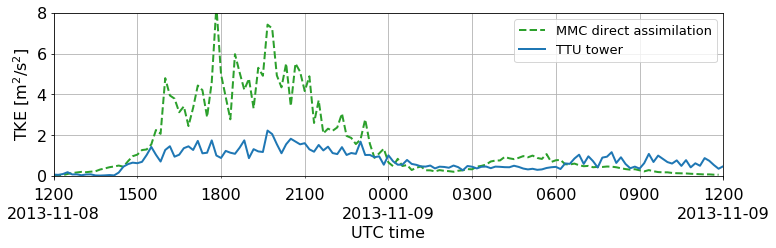

In [18]:
fig,ax = plot_timehistory_at_height(
    datasets={
        'MMC direct assimilation':direct_assimilatn_prob_10min,
        'TTU tower': tower_10min
    },
    fields='TKE',
    heights=zhub,
    timelimits=('2013-11-08 12:00:00','2013-11-09 12:00:00'),
    fieldlimits=(0,8),
    datasetkwargs={
        'MMC direct assimilation':{'linestyle':'--','color':'#2ca02c','linewidth':2},
        'TTU tower':{'linestyle':'-','color':'#1f77b4','linewidth':2}
    }
)

#Place legend at the top
leg = ax.legend(fontsize=13)

#Move xs tick down slightly to avoid overlap with y ticks in ax[1]
ax.tick_params(axis='x', which='minor', pad=10)
ax.tick_params(axis='x', which='major', pad=10)

# Adjust xaxis tick locations
ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator(minticks=2,maxticks=3))

#Save figure
figname = 'TKE_timehistory'
plt.savefig(os.path.join(datadir,figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 2

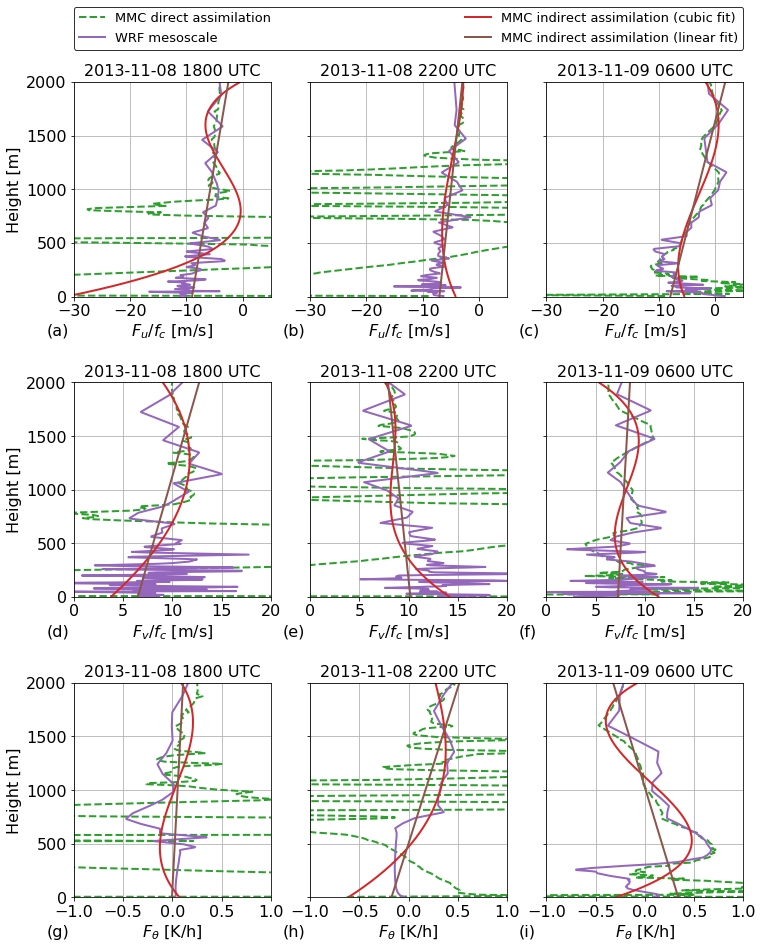

In [19]:
fig,ax = plot_profile(
    datasets={
        'MMC direct assimilation':direct_assimilatn_srch_60min,
        'WRF mesoscale':wrf_srch_60min,
        'MMC indirect assimilation (cubic fit)':indrct_assimilatn_srch_60min,
        'MMC indirect assimilation (linear fit)':indrct_assimilatn_M1_srch_60min,
    },
    times=selected_times,
    fields=['Fu','Fv','Ft'],
    fieldlabels={
        'Fu':r'$F_u/f_c$ [m/s]',
        'Fv':r'$F_v/f_c$ [m/s]',
        'Ft':r'$F_\theta$ [K/h]',
    },
    fieldlimits={
        'Fu':(-30,5),
        'Fv':(0,20),
        'Ft':(-1,1)
    },
    heightlimits=(0,2000),
    stack_by_datasets=True,
    datasetkwargs={
        'MMC direct assimilation':{'linestyle':'--','color':'#2ca02c','linewidth':2},
        'WRF mesoscale':{'linestyle':'-','color':'#9467bd','linewidth':2},
        'MMC indirect assimilation (cubic fit)':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC indirect assimilation (linear fit)':{'linestyle':'-','color':'#8c564b','linewidth':2}
    },
    labelsubplots=True,
)

#Place legend at the top
handles, labels = ax[0,2].get_legend_handles_labels()
ax[0,2].get_legend().remove()

leg = fig.legend(handles, labels, loc = 'lower left', bbox_to_anchor = (.125,.91,.775,0.0),
         borderaxespad=0,ncol=2,fontsize=13,
         bbox_transform = plt.gcf().transFigure,mode='expand')
leg.get_frame().set_edgecolor('k')

#Save figure
figname = 'ForceProfiles'
plt.savefig(os.path.join(datadir,figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 3

/home/dallaert/.conda-envs/py3env/lib/python3.6/site-packages/matplotlib/dates.py:1322: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 12.
  ' Defaulting to {0}.'.format(interval))


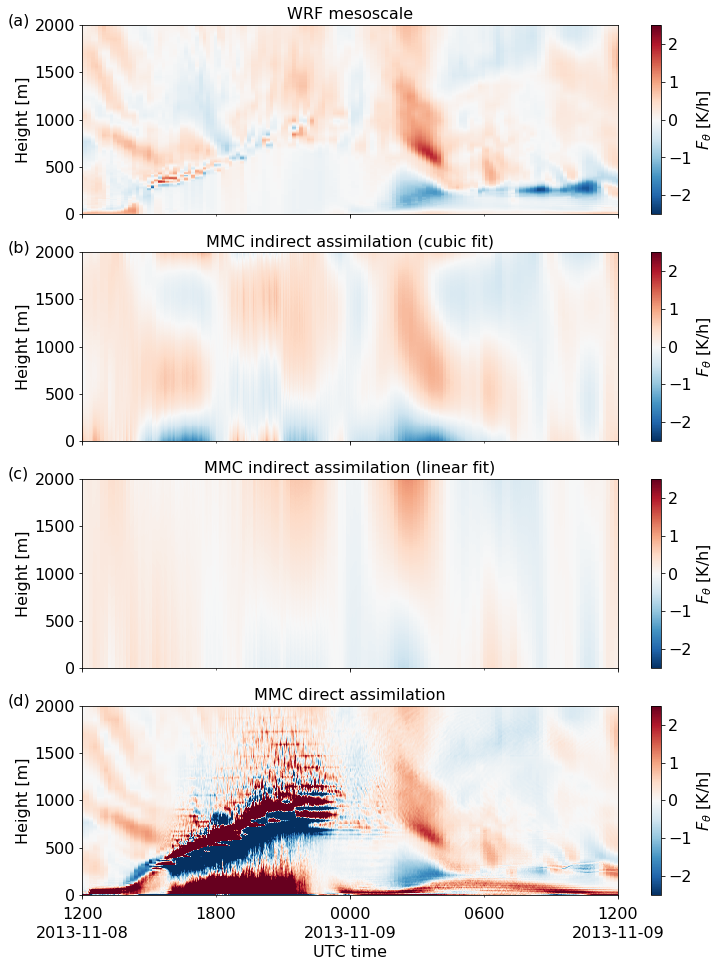

In [20]:
fig,ax, cbars = plot_timeheight(
    datasets={
        'WRF mesoscale':wrf_srch_10min,
        'MMC indirect assimilation (cubic fit)':indrct_assimilatn_srch,
        'MMC indirect assimilation (linear fit)':indrct_assimilatn_M1_srch,
        'MMC direct assimilation':direct_assimilatn_srch,
    },
    fields='Ft',
    fieldlabels=r'$F_\theta$ [K/h]',
    fieldlimits=(-2.5,2.5),
    timelimits=('2013-11-08 12:00:00','2013-11-09 12:00:00'),
    heightlimits=(0,2000),
    colorschemes='RdBu_r',
    labelsubplots=True,
    rasterized=True,
    shading='flat'
)

# Adjust subfigure spacing
fig.subplots_adjust(wspace=0.2,hspace=0.2)

#Move xs tick down slightly to avoid overlap with y ticks in ax[2]
ax[-1].tick_params(axis='x', which='minor', pad=10)
ax[-1].tick_params(axis='x', which='major', pad=10)

# Adjust xaxis tick locations
ax[-1].xaxis.set_minor_locator(mdates.HourLocator(byhour=range(24),interval=6))
ax[-1].xaxis.set_major_locator(mdates.AutoDateLocator(minticks=2,maxticks=2))

#Save figure
figname = 'Ftcontours'
plt.savefig(os.path.join(datadir,figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 4

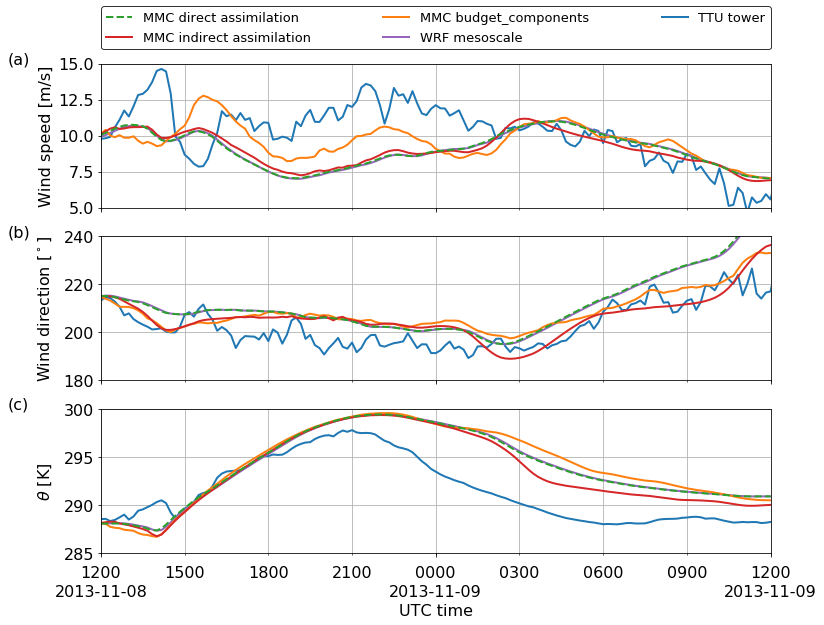

In [21]:
fig,ax = plot_timehistory_at_height(
    datasets={
        'TTU tower': tower_10min,
        'WRF mesoscale':wrf_pavg_10min,
        'MMC budget_components':budget_components_pavg_10min,
        'MMC indirect assimilation':indrct_assimilatn_pavg_10min,
        'MMC direct assimilation':direct_assimilatn_pavg_10min,
    },
    fields=['wspd','wdir','theta'],
    heights=zhub,
    timelimits=('2013-11-08 12:00:00','2013-11-09 12:00:00'),
    fieldlimits={
        'wspd':(5.,15.),
        'wdir':(180,240),
        'theta':(285,300)
    },
    labelsubplots=True,
    datasetkwargs={
        'TTU tower':{'linestyle':'-','color':'#1f77b4','linewidth':2},
        'WRF mesoscale':{'linestyle':'-','color':'#9467bd','linewidth':2},
        'MMC budget_components':{'linestyle':'-','color':'#ff7f0e','linewidth':2},
        'MMC indirect assimilation':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC direct assimilation':{'linestyle':'--','color':'#2ca02c','linewidth':2},
    },
)

#Move xs tick down slightly to avoid overlap with y ticks in
ax[-1].tick_params(axis='x', which='minor', pad=10)
ax[-1].tick_params(axis='x', which='major', pad=10)

# Adjust xaxis tick locations
ax[-1].xaxis.set_major_locator(mpl.dates.AutoDateLocator(minticks=2,maxticks=3))

#Place legend at the top
handles, labels = ax[0].get_legend_handles_labels()


leg = ax[0].legend(handles[-1::-1],labels[-1::-1],loc='lower left',bbox_to_anchor=(0.0,1.1,1.0,0.0),
             borderaxespad=0,fontsize=13,ncol=3,mode='expand')
leg.get_frame().set_edgecolor('k')

#Save figure
figname = 'mean_timehistory'
plt.savefig(os.path.join(datadir,figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 5

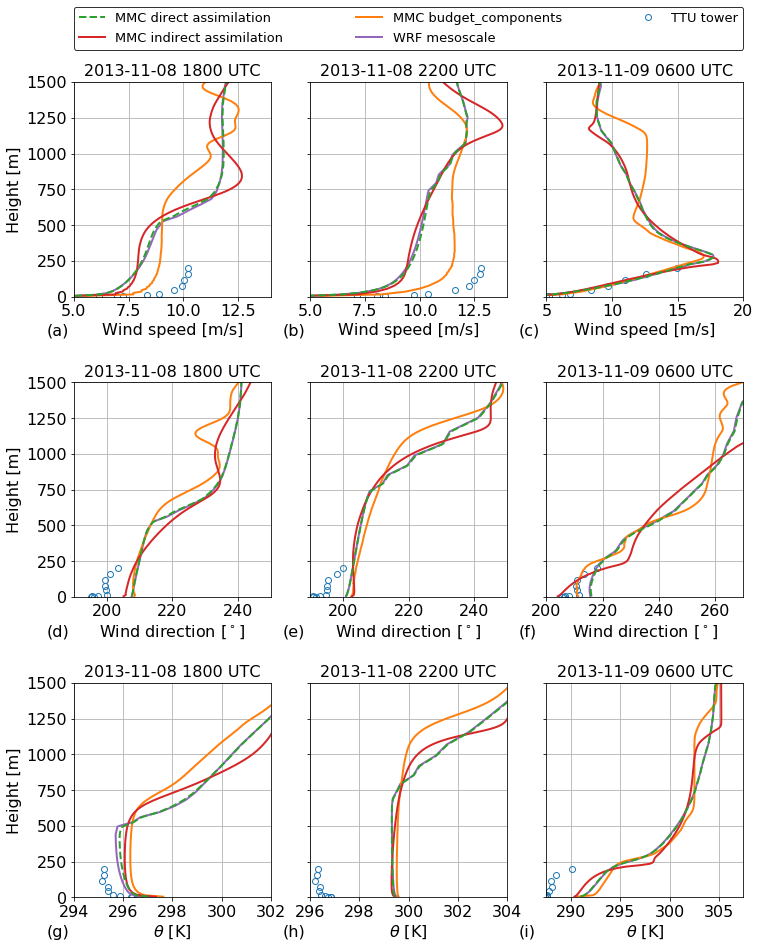

In [22]:
fig,ax = plot_profile(
    datasets={
        'TTU tower': tower_60min,
        'WRF mesoscale':wrf_pavg_60min,
        'MMC budget_components':budget_components_pavg_60min,
        'MMC indirect assimilation':indrct_assimilatn_pavg_60min,
        'MMC direct assimilation':direct_assimilatn_pavg_60min,
    },
    fields=['wspd','wdir','theta'],
    times=selected_times,
    fieldlimits={
        'wspd':(5.,14.),
        'wdir':(190,250),
    },
    heightlimits=(0,1500),
    stack_by_datasets=True,
    labelsubplots=True,
    datasetkwargs={
        'TTU tower':{'linestyle':'','marker':'o','mfc':'none','markersize':6,'color':'#1f77b4'},
        'WRF mesoscale':{'linestyle':'-','color':'#9467bd','linewidth':2},
        'MMC budget_components':{'linestyle':'-','color':'#ff7f0e','linewidth':2},
        'MMC indirect assimilation':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC direct assimilation':{'linestyle':'--','color':'#2ca02c','linewidth':2},
    },
)

# Set velocity limits
ax[0,2].set_xlim([5,20])
# Set wind direction limits
ax[1,2].set_xlim([200,270])
# Set temperature limits
ax[2,0].set_xlim([294,302])
ax[2,1].set_xlim([296,304])
ax[2,2].set_xlim([287.5,307.5])

#Place legend at the top
handles, labels = ax[0,2].get_legend_handles_labels()
ax[0,2].get_legend().remove()

leg = fig.legend(handles[-1::-1], labels[-1::-1], loc = 'lower left', bbox_to_anchor = (.125,.91,.775,0.0),
         borderaxespad=0,ncol=3,fontsize=13,
         bbox_transform = plt.gcf().transFigure,mode='expand')
leg.get_frame().set_edgecolor('k')

#Save figure
figname = 'meanprofiles'
plt.savefig(os.path.join(datadir,figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 6

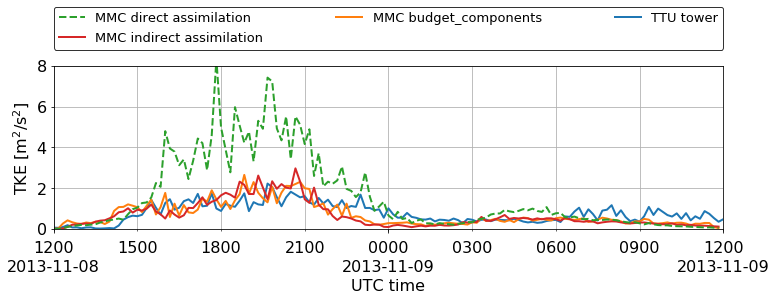

In [23]:
fig,ax = plot_timehistory_at_height(
    datasets={
        'TTU tower': tower_10min,
        'MMC budget_components':budget_components_prob_10min,
        'MMC indirect assimilation':indrct_assimilatn_prob_10min,
        'MMC direct assimilation':direct_assimilatn_prob_10min,
    },
    fields=['TKE'],
    heights=zhub,
    timelimits=('2013-11-08 12:00:00','2013-11-09 12:00:00'),
    fieldlimits=(0,8),
    datasetkwargs={
        'TTU tower':{'linestyle':'-','color':'#1f77b4','linewidth':2},
        'MMC budget_components':{'linestyle':'-','color':'#ff7f0e','linewidth':2},
        'MMC indirect assimilation':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC direct assimilation':{'linestyle':'--','color':'#2ca02c','linewidth':2},
    },
)

#Move xs tick down slightly to avoid overlap with y ticks in
ax.tick_params(axis='x', which='minor', pad=10)
ax.tick_params(axis='x', which='major', pad=10)

# Adjust xaxis tick locations
ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator(minticks=2,maxticks=3))

#Place legend at the top
handles, labels = ax.get_legend_handles_labels()


leg = ax.legend(handles[-1::-1],labels[-1::-1],loc='lower left',bbox_to_anchor=(0.0,1.1,1.0,0.0),
             borderaxespad=0,fontsize=13,ncol=3,mode='expand')
leg.get_frame().set_edgecolor('k')

#Save figure
figname = 'TKE_timehistory'
plt.savefig(os.path.join(datadir,figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 7

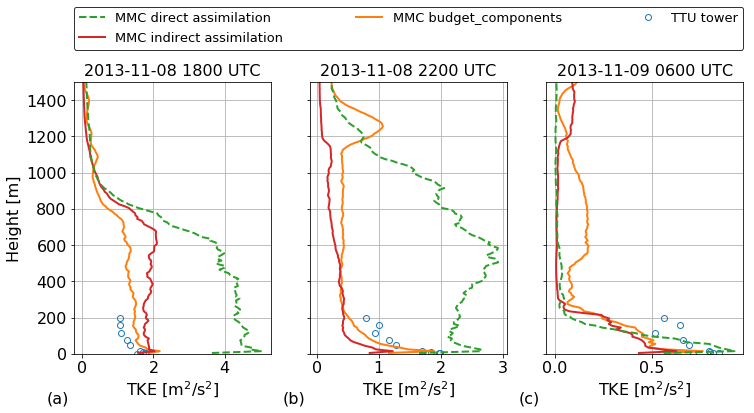

In [24]:
fig,ax = plot_profile(
    datasets={
        'TTU tower': tower_60min,
        'MMC budget_components':budget_components_prob_60min,
        'MMC indirect assimilation':indrct_assimilatn_prob_60min,
        'MMC direct assimilation':direct_assimilatn_prob_60min,
    },
    fields='TKE',
    times=selected_times,
    #fieldlimits=(),
    heightlimits=(0,1500),
    stack_by_datasets=True,
    labelsubplots=True,
    datasetkwargs={
        'TTU tower':{'linestyle':'','marker':'o','mfc':'none','markersize':6,'color':'#1f77b4'},
        'MMC budget_components':{'linestyle':'-','color':'#ff7f0e','linewidth':2},
        'MMC indirect assimilation':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC direct assimilation':{'linestyle':'--','color':'#2ca02c','linewidth':2},
    },
)

#Place legend at the top
handles, labels = ax[2].get_legend_handles_labels()
ax[2].get_legend().remove()

leg = fig.legend(handles[-1::-1], labels[-1::-1], loc = 'lower left', bbox_to_anchor = (.125,.97,.775,0.0),
         borderaxespad=0,ncol=3,fontsize=13,
         bbox_transform = plt.gcf().transFigure,mode='expand')
leg.get_frame().set_edgecolor('k')


#Save figure
figname = 'TKEprofiles'
plt.savefig(os.path.join(datadir,figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 8

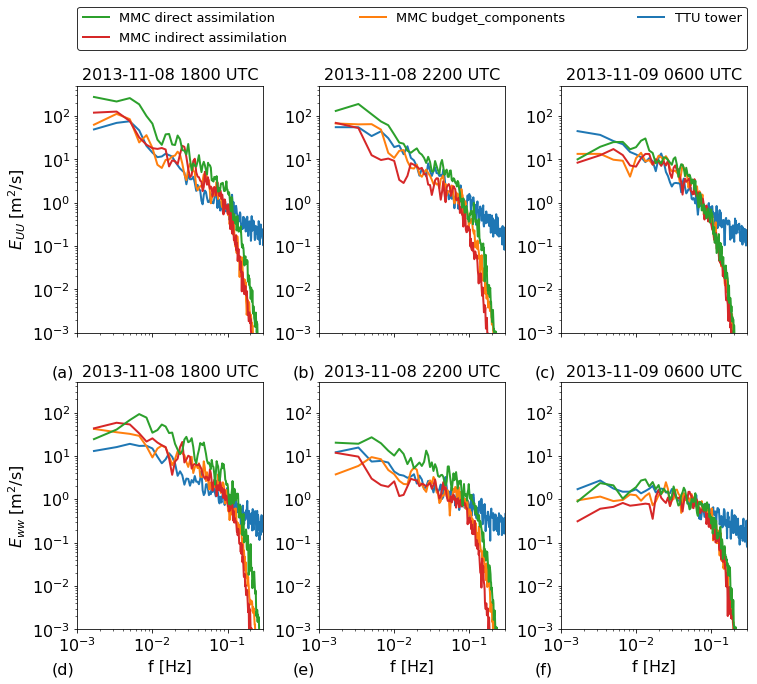

In [25]:
fig,ax = plot_spectrum(
    datasets={
        'TTU tower': tower_fspec,
        'MMC budget_components':budget_components_prob_fspec,
        'MMC indirect assimilation':indrct_assimilatn_prob_fspec,
        'MMC direct assimilation':direct_assimilatn_prob_fspec,
    },
    height=zhub,
    times=selected_times,
    fields=['wspd','w'],
    freqlimits=(0.001,0.3),
    fieldlimits={
        'wspd':(1.0e-3,5.0e2),
        'w':(1.0e-3,5.0e2)
    },
    labelsubplots=True,
    datasetkwargs={
        'TTU tower':{'linestyle':'-','color':'#1f77b4','linewidth':2},
        'MMC budget_components':{'linestyle':'-','color':'#ff7f0e','linewidth':2},
        'MMC indirect assimilation':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC direct assimilation':{'linestyle':'-','color':'#2ca02c','linewidth':2},
    },
)

#Place legend at the top
handles, labels = ax[0,2].get_legend_handles_labels()
ax[0,2].get_legend().remove()

leg = fig.legend(handles[-1::-1], labels[-1::-1], loc = 'lower left', bbox_to_anchor = (.125,.93,.775,0.0),
         borderaxespad=0,ncol=3,fontsize=13,
         bbox_transform = plt.gcf().transFigure,mode='expand')
leg.get_frame().set_edgecolor('k')

#Save figure
figname = 'spectrum'
plt.savefig(os.path.join(datadir,figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(datadir,figuredir,figname+'.pdf'),bbox_inches='tight')